In [14]:
import numpy as np
from config import get_config, ExperimentConfig, PredictionConfig
from data_preparation import prepare_dataset
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
latency_range = [5, 50, 100, 200, 500]
pred_conf = PredictionConfig(latencies=latency_range)

In [3]:
config = ExperimentConfig(prediction=pred_conf)

config.turbulence.max_samples = 10_000  # Smaller dataset
config.prediction.n_taps = 10    # Number of taps
config.data_split.min_train_samples = 1_000

config.features.enable_spectral = True   # Disable FFT
config.features.enable_rolling_stats = True
config.features.enable_ema = True
config.features.enable_acf = True
config.features.enable_decomposition = True

In [4]:
config_old = ExperimentConfig(prediction=pred_conf)

config_old.turbulence.max_samples = 10_000  # Smaller dataset
config_old.prediction.n_taps = 10    # Number of taps
config_old.data_split.min_train_samples = 1_000

config_old.features.enable_spectral = False   # Disable FFT
config_old.features.enable_rolling_stats = False
config_old.features.enable_ema = False
config_old.features.enable_acf = False
config_old.features.enable_decomposition = False

In [5]:
datasets = prepare_dataset('strong', config=config)


FSO Channel Power Estimation - Data Preparation Pipeline
Loading strong turbulence data from ./lin_wan5_strong_turb_samps.zip...
Loaded 10,000 samples (1.0 seconds)
Stats - Mean: -47.22 dB, Std: 6.60 dB
✓ Validation passed for raw data: shape=(10000,), range=[-24.6855, 15.4713]
Multi-Horizon Feature Engineering

Engineering features for latency=5 samples (0.50 ms)...
Generated 52 columns, 9,985 valid samples (15 rows dropped due to NaN)

Engineering features for latency=50 samples (5.00 ms)...
Generated 52 columns, 9,940 valid samples (60 rows dropped due to NaN)

Engineering features for latency=100 samples (10.00 ms)...
Generated 52 columns, 9,890 valid samples (110 rows dropped due to NaN)

Engineering features for latency=200 samples (20.00 ms)...
Generated 52 columns, 9,790 valid samples (210 rows dropped due to NaN)

Engineering features for latency=500 samples (50.00 ms)...
Generated 52 columns, 9,490 valid samples (510 rows dropped due to NaN)

Feature Engineering Complete

--

In [6]:
datasets_old = prepare_dataset('strong', config=config_old)


FSO Channel Power Estimation - Data Preparation Pipeline
Loading strong turbulence data from ./lin_wan5_strong_turb_samps.zip...
Loaded 10,000 samples (1.0 seconds)
Stats - Mean: -47.22 dB, Std: 6.60 dB
✓ Validation passed for raw data: shape=(10000,), range=[-24.6855, 15.4713]
Multi-Horizon Feature Engineering

Engineering features for latency=5 samples (0.50 ms)...
Generated 14 columns, 9,985 valid samples (15 rows dropped due to NaN)

Engineering features for latency=50 samples (5.00 ms)...
Generated 14 columns, 9,940 valid samples (60 rows dropped due to NaN)

Engineering features for latency=100 samples (10.00 ms)...
Generated 14 columns, 9,890 valid samples (110 rows dropped due to NaN)

Engineering features for latency=200 samples (20.00 ms)...
Generated 14 columns, 9,790 valid samples (210 rows dropped due to NaN)

Engineering features for latency=500 samples (50.00 ms)...
Generated 14 columns, 9,490 valid samples (510 rows dropped due to NaN)

Feature Engineering Complete

--

In [7]:
# feature_names = datasets[latency_range[0]]['feature_names']
feature_names = datasets_old[latency_range[0]]['feature_names']
print(f"Total features: {len(feature_names)}")
feature_names

Total features: 10


['OptPow_diff_lag5',
 'OptPow_diff_lag6',
 'OptPow_diff_lag7',
 'OptPow_diff_lag8',
 'OptPow_diff_lag9',
 'OptPow_diff_lag10',
 'OptPow_diff_lag11',
 'OptPow_diff_lag12',
 'OptPow_diff_lag13',
 'OptPow_diff_lag14']

In [8]:
# try do some predictions for 5 to 50 ms.
# Compare these predictions for different feature categories (and combination).
# Plot the RMSE for these predictions, just like the RMSE plot in your paper.

In [9]:
lagged = [f for f in feature_names if 'lag' in f]
rolling = [f for f in feature_names if 'rolling' in f]
ema = [f for f in feature_names if 'ema' in f]
spectral = [f for f in feature_names if 'spectral' in f]

print(f"Lagged: {len(lagged)}, Rolling: {len(rolling)}, EMA: {len(ema)}, Spectral: {len(spectral)}")

Lagged: 10, Rolling: 0, EMA: 0, Spectral: 0


In [20]:
rmse_curve = []
for latency in latency_range:
    train_X, train_y = datasets[latency]['train']
    test_X, test_y = datasets[latency]['test']
    
    model = LinearRegression()
    model.fit(train_X, train_y)
    pred = model.predict(test_X)
    rmse = np.sqrt(mean_squared_error(test_y, pred))
    rmse_curve.append(rmse)
    
    print(f"Latency {latency:3d} ({latency/10:.1f}ms): RMSE = {rmse:.4f}")

Latency   5 (0.5ms): RMSE = 0.0000
Latency  50 (5.0ms): RMSE = 2.5825
Latency 100 (10.0ms): RMSE = 5.5375
Latency 200 (20.0ms): RMSE = 6.2628
Latency 500 (50.0ms): RMSE = 5.8834


In [21]:
rmse_curve_old = []

for latency in latency_range:
    train_X, train_y = datasets_old[latency]['train']
    test_X, test_y = datasets_old[latency]['test']
    
    model = LinearRegression()
    model.fit(train_X, train_y)
    pred = model.predict(test_X)
    rmse = np.sqrt(mean_squared_error(test_y, pred))
    rmse_curve_old.append(rmse)
    
    print(f"Latency {latency:3d} ({latency/10:.1f}ms): RMSE = {rmse:.4f}")

Latency   5 (0.5ms): RMSE = 2.1010
Latency  50 (5.0ms): RMSE = 6.9249
Latency 100 (10.0ms): RMSE = 7.3322
Latency 200 (20.0ms): RMSE = 8.9088
Latency 500 (50.0ms): RMSE = 9.7663


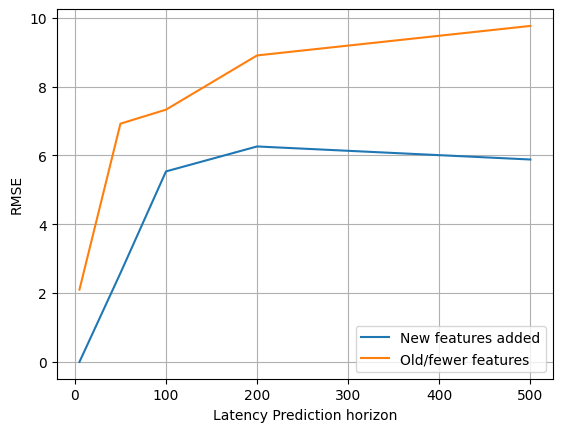

In [23]:
plt.plot(latency_range,rmse_curve, label= 'New features added')
plt.plot(latency_range,rmse_curve_old, label='Old/fewer features')
plt.legend()
plt.xlabel('Latency Prediction horizon')
plt.ylabel('RMSE')
plt.grid()